# Predicting the next Tennis Tournament Winner's country

For this project we are using he dataset containing the information about the tennis players from various countries to develop a predictive model, for forecasting the next tournament winner's country. The data set includes multiple varibles like winner's height, age, rank, country, loser's country age, height and match statistics. 

The data captures diverse data from 2017 to 2019, so in this project by grouping winners based in their countries and historical tournament data, we aim to identify patterns and trends that can predict about the future tournament outcomes. 

First we will read the data using various libraries and functions.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
library(dplyr)
library(rsample)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Now we will use functions like "read_csv" to get the data set. Next we will change the characteristics of the categorical variable. Also we fropped the "na" values for the numerical varibles.

In [2]:
# Read the dataset from the web into R
tennis_players <- read_csv("data/tennis_players.csv")
# Preprocess data
tournament_players <- tennis_players |>
mutate(winner_country=as.factor(winner_ioc))


New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Here we will group the winner countries and count the number of times they won the tournament. Also, we will calculate the averages of age and height.

In [3]:
# Group winners by country and calculate statistics
winner_stats <- tournament_players |>
  group_by(winner_country) |>
  summarize(avg_age = mean(winner_age, na.rm = TRUE), 
            avg_height = mean(winner_ht, na.rm = TRUE),
            total_wins = n())|>
filter(!is.na(avg_height))|>
filter(total_wins>30)
winner_stats

winner_country,avg_age,avg_height,total_wins
<fct>,<dbl>,<dbl>,<int>
ARG,27.97259,184.4926,389
AUS,24.07626,189.6061,295
AUT,24.68328,185.0000,157
BEL,28.46732,165.5746,148
BIH,25.96133,172.0000,85
BRA,27.31489,183.0000,42
BUL,26.80617,188.0000,88
CAN,23.12242,194.5567,215
CRO,28.01608,200.4242,212


So from the above steps we got four variables, one of them is a categorical varible and the others we will use as a predictors. 
So we are trying to predict the name of the winner country in tennis matches based on certain player characteristics. We aim to use these to train a predictive model.

So we split the data into two sets:
# Training Set:
- It is used to train the predictive model. It contains a subset of data with known outcomes, and this we will use to learn some patterns between input and predictive varibales.
- It also helps us to minimise the prediction error.

# Testing Set:
- This set is used to evaluate the performance of the trained model. It consists of the data that has not been classified inot training set.
- It helps us to assess the performance of the model.
- By comparing the prediction with testing set and the actual outcome we can measure it's accuracy, percision and recall.

This approach helps us to evaluate the performance of the model, and also helps us to check whether it is overfitting or underfitting.

In [4]:
# Split the dataset into training and testing sets
library(rsample)
set.seed(123) # for reproducibility
data_split <- initial_split(winner_stats, prop = 0.8)
data_train <- training(data_split)
data_test <- testing(data_split)
data_train
data_test

winner_country,avg_age,avg_height,total_wins
<fct>,<dbl>,<dbl>,<int>
HUN,27.01081,180.0000,60
NED,30.84991,190.0000,58
GER,27.06700,189.9818,460
AUT,24.68328,185.0000,157
CZE,25.74521,196.0000,48
KAZ,27.96418,183.0000,73
RUS,23.28484,185.0575,356
ESP,30.90478,186.0724,679
BIH,25.96133,172.0000,85


winner_country,avg_age,avg_height,total_wins
<fct>,<dbl>,<dbl>,<int>
ARG,27.97259,184.4926,389
AUS,24.07626,189.6061,295
FRA,29.92857,187.8065,709
SLO,28.95868,181.2456,57
SRB,28.65757,186.1649,353
URU,32.36745,180.0000,52


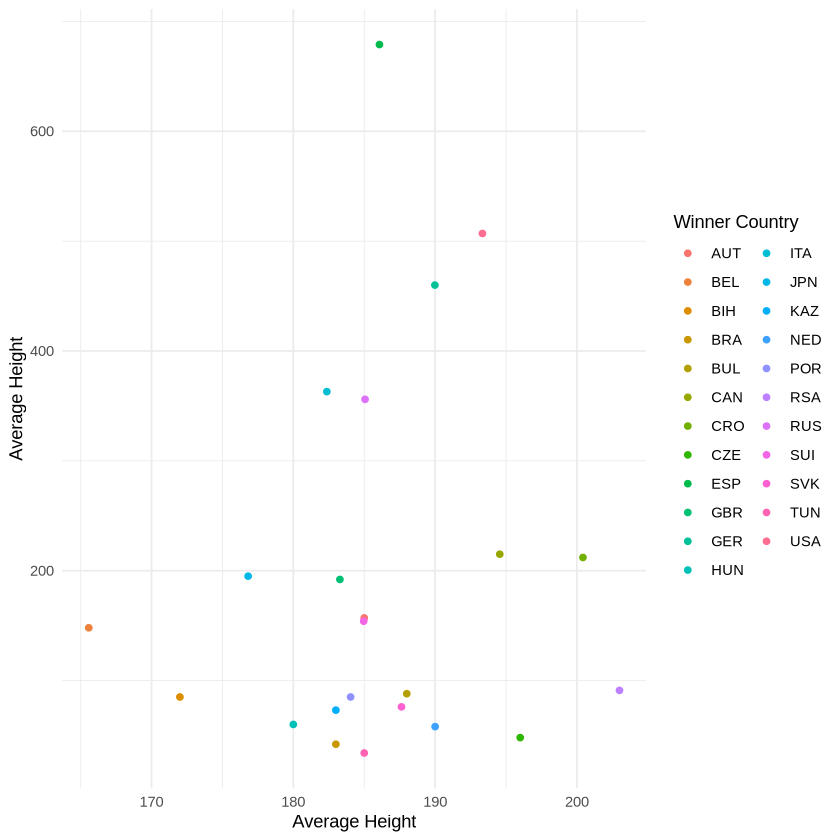

In [5]:
plot_winner_countries<-data_train|>
ggplot(aes(x = avg_height, y = total_wins, color=winner_country)) +
  geom_point() +

  labs(x = "Average Height", y = "Average Height", color = "Winner Country") +
  theme_minimal()
plot_winner_countries

# Methods:
- For data analysis we used variblse such as winner_age, winner_height, and winner_country. These are relevant as they provide information about the characteristics of tennis players and the countries they represent.
- We also considered total_wins variable, which represents the number of wins for each country, as a target variable for prediction.
  

To visualize the results, we created scatter plots to explore the relationship between  winner_height and total_wins, as well as winner_country as a color-base. This helped identify any patterns or trends in the data.

Expected outcomes:
- We expect that the more the height of the player the more chances are there that the player will win. Also, countries with more wins will have a higher representation in the dataset, i.e. more total wins. 

# Predictive Questions:

- Are there specific age or height ranges that are associated with the winner?
- How the country of the player affects as the winning?